/home/mamunds/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_1150396/3326185188.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month']=orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1150396/3326185188.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['cohort_month']=orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')


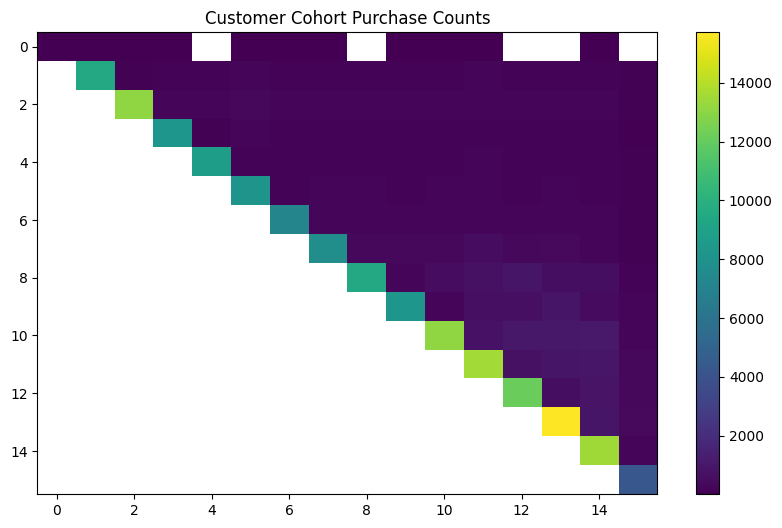

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

orders['created_at']=pd.to_datetime(orders['created_at'])
orders['order_month']=orders['created_at'].dt.to_period('M')
orders['cohort_month']=orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')

cohort = orders.groupby(['cohort_month','order_month']).agg(n_customers=('customer_id','nunique')).reset_index()
cohort_pivot = cohort.pivot(index='cohort_month', columns='order_month', values='n_customers')

plt.figure(figsize=(10,6))
plt.imshow(cohort_pivot, aspect='auto')
plt.title("Customer Cohort Purchase Counts")
plt.colorbar()
plt.show()
